In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'axes.spines.top': False, 'axes.spines.right': False, 'savefig.dpi': 1200})
import numpy as np

model_paths = [
    'store/exported/ResNet50.pt',
    'store/exported/BlurResNet50_[3].pt',
    'store/exported/BlurResNet50_[5].pt',
    'store/exported/BlurResNet50_[9].pt',
    'store/exported/BlurResNet50_[15].pt',
]

In [2]:
from jarvis.vision import prepare_datasets

dataset = prepare_datasets('ImageNet', 'datasets')

In [3]:
from roarena.attack import AttackJob

job = AttackJob('store/a-tests', 'datasets', read_only=True)

In [4]:
metric, targeted = 'L2', True
shuffle_mode, shuffle_tag = 'elm', 0
min_epoch = 2

In [5]:
q_ticks, d_ticks, sample_idxs, advs = job.summarize(model_paths, metric, targeted, shuffle_mode, shuffle_tag, min_epoch=min_epoch, min_prob=0.1, num_advs=6)

In [6]:
sample_idxs

[761, 81, 760, 86, 799, 490]

In [6]:
sample_idxs

[971, 531, 51, 375, 822, 500]

In [7]:
advs.shape

(5, 6, 3, 224, 224)

In [7]:
import torch

imgs = torch.stack([dataset[s_idx][0] for s_idx in sample_idxs]).numpy()

In [8]:
imgs.shape

(6, 3, 224, 224)

In [9]:
diffs = advs-imgs

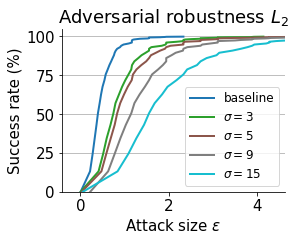

In [10]:
legends = ['baseline', r'$\sigma=3$', r'$\sigma=5$', r'$\sigma=9$', r'$\sigma=15$']

ax = job.plot_digest(q_ticks, d_ticks, legends=legends)
ax.set_title('Adversarial robustness {}'.format(r'$L_2$' if metric=='L2' else r'$L_\infty$'))
plt.show()

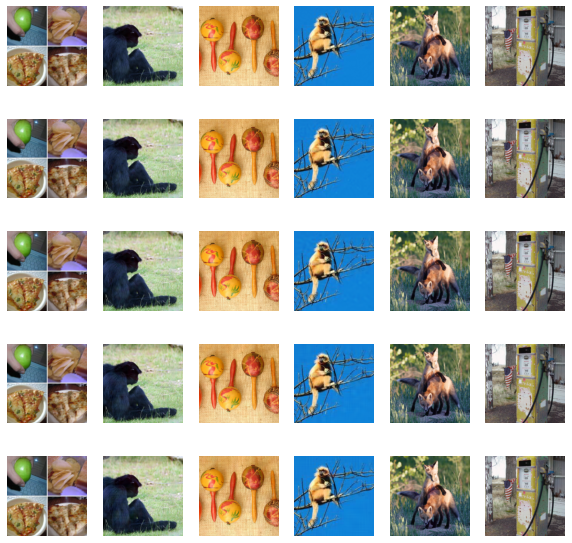

In [ ]:
_, axes = plt.subplots(5, 6, figsize=(10, 10))
for i in range(len(model_paths)):
    for j in range(6):
        ax = axes[i, j]
        ax.imshow(advs[i, j].transpose(1, 2, 0))
        ax.axis('off')
plt.show()

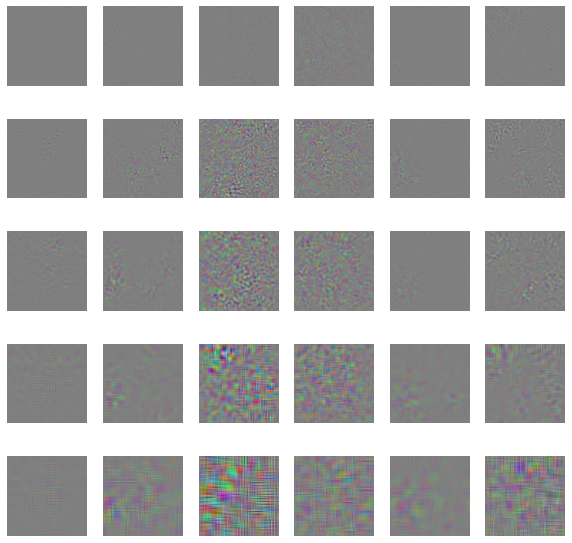

In [ ]:
_, axes = plt.subplots(5, 6, figsize=(10, 10))
vmax = np.abs(diffs).max()
_diffs = (diffs+vmax)/(2*vmax)
for i in range(len(model_paths)):
    for j in range(6):
        ax = axes[i, j]
        # ax.imshow(np.abs(diffs[i, j]).max(axis=0), vmin=0, vmax=vmax, cmap='jet')
        ax.imshow(_diffs[i, j].transpose(1, 2, 0))
        ax.axis('off')
plt.show()

In [53]:
sample_idxs[0]

971

In [35]:
dataset[sample_idxs[0]][1]

163

In [36]:
dataset.class_names[163]

'bloodhound'

In [50]:
targets = job.shuffled_targets(dataset.targets, shuffle_mode, shuffle_tag)

In [54]:
targets[971]

219

In [41]:
dataset.class_names[targets[163]]

'restaurant'

In [44]:
config = {
    'model_path': model_paths[0], 'sample_idx': sample_idxs[0],
    'targeted': targeted, 'metric': metric,
    'shuffle_mode': shuffle_mode, 'shuffle_tag': shuffle_tag,
}
epoch, ckpt, preview = job.load_ckpt(config)

In [46]:
preview.keys()

dict_keys(['label_raw', 'prob_raw', 'pred_raw', 'target', 'successes_pgd', 'dists_pgd', 'probs_pgd', 'preds_pgd', 'successes_bb', 'dists_bb', 'probs_bb', 'preds_bb'])

In [47]:
preview['pred_raw']

163

In [49]:
targets[163]

762

In [52]:
preview['preds_bb']

array([219, 219, 219, 219, 219, 219, 219, 219, 219])

NameError: name '_diffs' is not defined

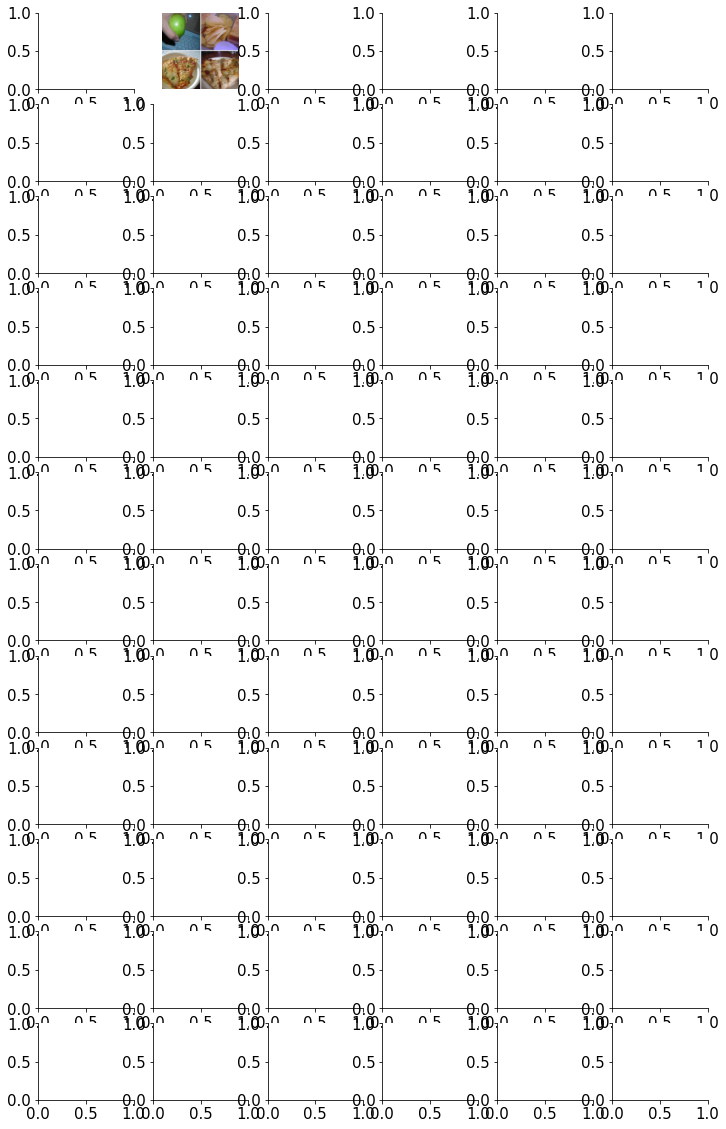

In [ ]:
_, axes = plt.subplots(12, 6, figsize=(12, 20))
for i in range(5):
    for j in range(6):
        ax = axes[2*j, i+1]
        ax.imshow(advs[i, j].transpose(1, 2, 0))
        ax.axis('off')
        ax = axes[2*j+1, i+1]
        ax.imshow(_diffs[i, j].transpose(1, 2, 0))
        ax.axis('off')
for j in range(6):
    ax = axes[2*j, 0]
    ax.imshow(imgs[j].transpose(1, 2, 0))
    ax.axis('off')
    ax = axes[2*j+1, 0]
    ax.axis('off')
plt.show()

In [6]:
shared_idxs = set([8, 3, 5, 2])

In [10]:
import random

random.sample(list(shared_idxs), 2)

[3, 5]

In [37]:
np.quantile(np.array(min_dists), q_ticks).shape

(100,)

In [30]:
_min_dists

[1.7674793]

In [36]:
np.array(min_dists).shape

(339, 1)

In [20]:
1-np.logspace(0, -3, 50)

array([0.        , 0.13148863, 0.24568799, 0.34487144, 0.4310134 ,
       0.50582866, 0.57080657, 0.62724063, 0.67625425, 0.71882313,
       0.75579469, 0.78790491, 0.815793  , 0.84001413, 0.86105045,
       0.87932074, 0.89518869, 0.90897018, 0.92093957, 0.93133512,
       0.94036377, 0.94820525, 0.95501567, 0.9609306 , 0.96606778,
       0.97052948, 0.97440452, 0.97777004, 0.98069302, 0.98323167,
       0.98543652, 0.98735145, 0.98901459, 0.99045905, 0.99171357,
       0.99280314, 0.99374945, 0.99457132, 0.99528513, 0.99590508,
       0.99644352, 0.99691116, 0.9973173 , 0.99767005, 0.99797641,
       0.99824249, 0.99847358, 0.99867429, 0.9988486 , 0.999     ])

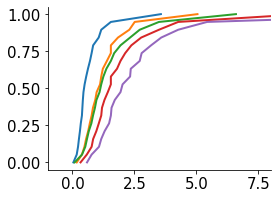

In [4]:
metric = 'L2'
targeted = True
shuffle_mode, shuffle_tag = 'elm', 0
min_epoch = 2

_, ax = plt.subplots(figsize=(4, 3))
q_ticks = np.linspace(0, 1, 20)
for model_path in model_paths:

    min_probs = [0.2, 0.6, 0.8, 0.9, 0.95]
    min_dists = []
    for sample_idx in range(1000):
        try:
            _min_dists, _, _ = job.best_attack(
                model_path, metric, targeted, shuffle_mode, shuffle_tag, sample_idx,
                min_epoch=min_epoch, min_probs=min_probs, return_advs=False,
            )
            min_dists.append(_min_dists)
        except:
            pass
    
    ax.plot(np.quantile(np.array(min_dists)[:, 0], q_ticks), q_ticks)
ax.set_xlim([-1, 8])
plt.show()

In [2]:
from roarena.attack import AttackJob

# job = AttackJob('store/a-tests', 'datasets', read_only=True)
job = AttackJob('store/a-tests', 'datasets')

In [15]:
config = {
    'model_path': model_paths[3],
    'metric': 'L2', 'targeted': True,
    'shuffle_mode': 'elm', 'shuffle_tag': 0,
    'sample_idx': 242,
}

In [16]:
epoch, ckpt, preview = job.load_ckpt(config)

In [20]:
ckpt, preview = job.main(config, num_epochs=2)

{'model_path': 'store/exported/BlurResNet50_[9].pt', 'metric': 'L2', 'targeted': True, 'shuffle_mode': 'elm', 'shuffle_tag': 0, 'sample_idx': 242}
Checkpoint (epoch 1) loaded successfully.
Epoch 1
PGD attacks for 100 epsilons performed (1m32.87s)


/usr/local/lib/python3.9/dist-packages/foolbox/attacks/brendel_bethge.py:626: UserWarning: At the first initialisation the optimizer needs to be compiled. This may take between 20 to 60 seconds.
  warnings.warn(


BB attacks for 9 overshoots performed (5m18.39s)


In [21]:
ckpt.keys()

dict_keys(['label_raw', 'prob_raw', 'pred_raw', 'target', 'advs_pgd', 'successes_pgd', 'dists_pgd', 'probs_pgd', 'preds_pgd', 'advs_bb', 'successes_bb', 'dists_bb', 'probs_bb', 'preds_bb'])

In [22]:
ckpt['dists_pgd']

array([ 0.3879794,  0.7759588,  1.1639382,  1.5519174,  1.9398968,
        2.3278763,  2.7158556,  3.1038342,  3.4918041,  3.8797827,
        4.267769 ,  4.6557302,  5.029316 ,  5.431676 ,  5.8196692,
        6.2076488,  6.5846415,  6.983612 ,  7.371598 ,  7.7595773,
        8.147539 ,  8.535494 ,  8.910988 ,  9.301293 ,  9.69943  ,
       10.087449 , 10.475415 , 10.863339 , 11.244492 , 11.63917  ,
       12.027238 , 12.415242 , 12.8031845, 13.191213 , 13.57917  ,
       13.967109 , 14.355149 , 14.735794 , 15.130796 , 15.51898  ,
       15.906572 , 16.294615 , 16.682743 , 17.070618 , 17.458826 ,
       17.84681  , 18.234697 , 18.62283  , 19.010738 , 19.398594 ,
       19.785513 , 20.174585 , 20.562521 , 20.949192 , 21.33793  ,
       21.725845 , 22.11401  , 22.501768 , 22.89005  , 23.277025 ,
       23.65644  , 24.053219 , 24.442097 , 24.817348 , 25.172869 ,
       25.549805 , 25.844059 , 26.231129 , 26.641668 , 27.002031 ,
       27.312628 , 27.68358  , 28.08772  , 28.394903 , 28.7873

In [24]:
ckpt['probs_pgd']

array([0.16916162, 0.14726911, 0.19180734, 0.5875343 , 0.9053274 ,
       0.98710537, 0.9992778 , 0.99942446, 0.9999578 , 0.99999166,
       0.9999981 , 0.99999976, 0.9999999 , 0.9999999 , 1.        ,
       1.        , 0.9999999 , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99999976, 0.99999964, 1.        ,
       1.        , 1.        , 1.        , 0.99999964, 1.        ,
       0.9999999 , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99999964, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.9999999 , 1.        ,
       0.99999964, 1.        , 0.9999999 , 0.99999833, 0.9999994 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99999833, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.9999988 , 1.        , 1.        , 1.     

In [23]:
ckpt['dists_bb']

array([ 0.7419813 ,  0.8424363 ,  0.96719974,  1.4761952 ,  1.3866888 ,
       15.898142  , 16.302021  , 16.742617  , 17.146496  ], dtype=float32)

In [25]:
ckpt['probs_bb']

array([0.06207113, 0.15065819, 0.206942  , 0.7430198 , 0.63062763,
       0.862795  , 0.9095925 , 0.9439424 , 0.9644862 ], dtype=float32)

In [26]:
config['sample_idx'] = 1
ckpt, preview = job.main(config, num_epochs=1)

{'model_path': 'store/exported/BlurResNet50_[9].pt', 'metric': 'L2', 'targeted': True, 'shuffle_mode': 'elm', 'shuffle_tag': 0, 'sample_idx': 1}
Checkpoint (epoch 1) loaded successfully.


In [27]:
ckpt['dists_pgd']

array([ 0.38797936,  0.7759499 ,  1.1638865 ,  1.5514764 ,  1.9397174 ,
        2.3273764 ,  2.7148528 ,  3.1031532 ,  3.490664  ,  3.8786669 ,
        4.267093  ,  4.654872  ,  5.0426817 ,  5.4307632 ,  5.8187327 ,
        6.206548  ,  6.5940723 ,  6.9818654 ,  7.3704033 ,  7.7585907 ,
        8.1458025 ,  8.5274105 ,  8.922255  ,  9.309536  ,  9.697762  ,
       10.084087  , 10.47476   , 10.85419   , 11.240072  , 11.637089  ,
       12.025671  , 12.413579  , 12.802441  , 13.189414  , 13.57831   ,
       13.966055  , 14.352733  , 14.740968  , 15.130109  , 15.39093   ,
       15.906133  , 16.135302  , 16.394379  , 16.810013  , 17.439995  ,
       17.491022  , 17.84541   , 18.192701  , 18.497404  , 19.026323  ,
       19.240202  , 19.553904  , 19.925032  , 20.51633   , 20.617004  ,
       21.177368  , 21.279625  , 21.68805   , 22.120407  , 22.257936  ,
       22.782503  , 23.165499  , 23.311237  , 23.944197  , 24.170694  ,
       24.45574   , 24.75703   , 25.031734  , 25.49374   , 25.71

In [28]:
ckpt['probs_pgd']

array([0.5212092 , 0.39802682, 0.2527001 , 0.20689146, 0.29556015,
       0.8759085 , 0.98200274, 0.9924321 , 0.99861753, 0.9988136 ,
       0.99985695, 0.99979824, 0.9998746 , 0.99999666, 0.9999893 ,
       0.99993956, 0.99999404, 0.9999864 , 0.9999988 , 0.99999666,
       0.9999958 , 0.99999976, 0.99999905, 0.9999999 , 0.9999999 ,
       1.        , 1.        , 0.9999999 , 0.9999995 , 1.        ,
       0.99999964, 0.9999999 , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99999976, 1.        , 0.9999982 ,
       1.        , 1.        , 0.99999976, 1.        , 0.99999976,
       1.        , 1.        , 0.99999976, 0.9999958 , 1.        ,
       1.        , 0.9999982 , 1.        , 0.99999976, 0.9999988 ,
       0.9999993 , 1.        , 0.9999994 , 1.        , 0.9999999 ,
       1.        , 0.99999976, 0.9999994 , 0.9999994 , 1.        ,
       1.        , 0.9999993 , 0.9999901 , 0.99999905, 0.99999785,
       0.99999976, 1.        , 0.9999993 , 1.        , 0.99999

In [29]:
ckpt['dists_bb']

array([  0.7308373,   0.7569614,   1.5970355,   1.6307788,   0.8358581,
       101.13605  , 103.0389   , 147.28325  ,  99.21302  ], dtype=float32)

In [30]:
ckpt['probs_bb']

array([0.18857566, 0.35213408, 0.3326661 , 0.3781987 , 0.719856  ,
       0.9074319 , 0.69382316, 0.9185221 , 0.93540406], dtype=float32)

In [19]:
np.array(min_dists).shape

(760, 5)

In [24]:
np.quantile(np.array(min_dists)[:, 0], [0, 0.4, 0.8])

array([0.22744717, 1.79540601, 3.49180117])

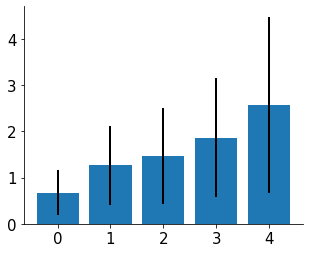

In [23]:
_, ax = plt.subplots(figsize=(5, 4))
plt.show()

In [12]:
advs[0].shape

(3, 224, 224)

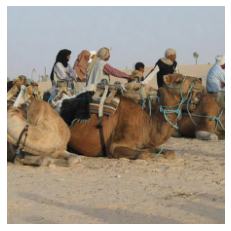

In [13]:
_, ax = plt.subplots(figsize=(4, 4))
ax.imshow(advs[0].transpose(1, 2, 0))
ax.axis('off')
plt.show()

In [7]:
next(iter(job.configs.values()))

{'model_path': 'store/exported/BlurResNet50_[3].pt',
 'metric': 'LI',
 'targeted': True,
 'shuffle_mode': 'elm',
 'shuffle_tag': 1,
 'sample_idx': 952}

In [41]:
cond = {
    'model_path': 'store/exported/ResNet50.pt',
    'metric': 'LI',
    'targeted': True,
    'shuffle_tag': 1,
    # 'sample_idx': 343,
}

# for key in job.completed(cond=cond):
#     print(job.configs[key])
probs = []
for key in job.completed(cond=cond):
    probs.append(job.previews[key]['prob_raw'])

In [43]:
np.min(probs)

0.01909461058676243

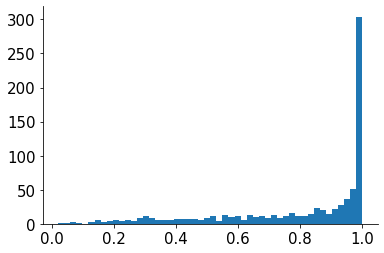

In [44]:
plt.hist(probs, 50)
plt.show()

In [8]:
model_path = model_paths[2]
metric = 'L2'
targeted = True
shuffle_mode, shuffle_tag = 'elm', 0

sample_idx = 0

config = {
    'model_path': model_path,
    'metric': metric, 'targeted': targeted,
    'shuffle_mode': shuffle_mode, 'shuffle_tag': shuffle_tag,
    'sample_idx': sample_idx,
}
key = job.configs.get_key(config)

In [22]:
ckpt = job.ckpts[key]

In [23]:
ckpt.keys()

dict_keys(['label_raw', 'prob_raw', 'pred_raw', 'target', 'advs_pgd', 'successes_pgd', 'dists_pgd', 'probs_pgd', 'preds_pgd', 'advs_bb', 'successes_bb', 'dists_bb', 'probs_bb', 'preds_bb'])

In [11]:
preview = job.previews[key]

In [40]:
preview.keys()

dict_keys(['label_raw', 'prob_raw', 'pred_raw', 'target', 'successes_pgd', 'dists_pgd', 'probs_pgd', 'preds_pgd', 'successes_bb', 'dists_bb', 'probs_bb', 'preds_bb'])

In [48]:
min_prob = 0.99

idxs, = (preview['successes_pgd']&(preview['probs_pgd']>min_prob)).nonzero()

In [49]:
idxs

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [32]:
preview['dists_pgd'][idxs]

array([ 2.3278763,  2.7158556,  3.103835 ,  3.4918146,  3.8797936,
        4.267773 ,  4.6557527,  5.043732 ,  5.431711 ,  5.8196907,
        6.20767  ,  6.5956492,  6.9836273,  7.371608 ,  7.759588 ,
        8.147566 ,  8.535546 ,  8.923509 ,  9.311505 ,  9.699484 ,
       10.087464 , 10.474635 , 10.863422 , 11.251387 , 11.6393795,
       12.027355 , 12.415334 , 12.802862 , 13.191296 , 13.579276 ,
       13.963237 , 14.35523  , 14.740479 , 15.131162 , 15.519143 ,
       15.907148 , 16.295082 , 16.683088 , 17.071005 , 17.45904  ,
       17.84696  , 18.23499  , 18.622963 , 19.010918 , 19.398918 ,
       19.78683  , 20.174871 , 20.562876 , 20.950796 , 21.338785 ,
       21.726772 , 22.114712 , 22.502726 , 22.890663 , 23.278643 ,
       23.666632 , 24.054615 , 24.442574 , 24.830595 , 25.218393 ,
       25.606445 , 25.99437  , 26.382446 , 26.770433 , 27.15827  ,
       27.546263 , 27.934366 , 28.322258 , 28.710217 , 29.098232 ,
       29.486311 , 29.874073 , 30.26222  , 30.649958 , 31.0380

In [34]:
best_idx = idxs[np.argmin(preview['dists_pgd'][idxs])]

In [45]:
min_prob = 0.99

idxs, = (preview['successes_bb']&(preview['probs_bb']>min_prob)).nonzero()

In [46]:
idxs

array([], dtype=int64)

In [47]:
len(idxs)

0

In [38]:
preview['dists_bb'][idxs]

array([], dtype=float32)

In [39]:
best_idx = idxs[np.argmin(preview['dists_bb'][idxs])]

ValueError: attempt to get argmin of an empty sequence

In [17]:
min_prob = 0.8

preview['dists_pgd'][preview['successes_pgd']&(preview['probs_pgd']>min_prob)]

array([ 1.5519176,  1.939897 ,  2.3278763,  2.7158556,  3.103835 ,
        3.4918146,  3.8797936,  4.267773 ,  4.6557527,  5.043732 ,
        5.431711 ,  5.8196907,  6.20767  ,  6.5956492,  6.9836273,
        7.371608 ,  7.759588 ,  8.147566 ,  8.535546 ,  8.923509 ,
        9.311505 ,  9.699484 , 10.087464 , 10.474635 , 10.863422 ,
       11.251387 , 11.6393795, 12.027355 , 12.415334 , 12.802862 ,
       13.191296 , 13.579276 , 13.963237 , 14.35523  , 14.740479 ,
       15.131162 , 15.519143 , 15.907148 , 16.295082 , 16.683088 ,
       17.071005 , 17.45904  , 17.84696  , 18.23499  , 18.622963 ,
       19.010918 , 19.398918 , 19.78683  , 20.174871 , 20.562876 ,
       20.950796 , 21.338785 , 21.726772 , 22.114712 , 22.502726 ,
       22.890663 , 23.278643 , 23.666632 , 24.054615 , 24.442574 ,
       24.830595 , 25.218393 , 25.606445 , 25.99437  , 26.382446 ,
       26.770433 , 27.15827  , 27.546263 , 27.934366 , 28.322258 ,
       28.710217 , 29.098232 , 29.486311 , 29.874073 , 30.2622

In [18]:
preview['dists_bb'][preview['successes_bb']&(preview['probs_bb']>min_prob)]

array([68.85682 , 79.53911 , 66.467476], dtype=float32)

In [58]:
ckpt.keys()

dict_keys(['label_raw', 'prob_raw', 'pred_raw', 'target', 'advs_pgd', 'successes_pgd', 'dists_pgd', 'probs_pgd', 'preds_pgd', 'advs_bb', 'successes_bb', 'dists_bb', 'probs_bb', 'preds_bb'])

In [61]:
ckpt['advs_pgd'].shape

(100, 3, 224, 224)

In [ ]:
ckpt['

In [20]:
max_dist = 5

preview['probs_pgd'][preview['successes_pgd']&(preview['dists_pgd']<max_dist)]

array([0.5173164 , 0.87603974, 0.9861611 , 0.9930501 , 0.997042  ,
       0.99904317, 0.9994281 , 0.99977106, 0.9999329 , 0.99991965],
      dtype=float32)

In [56]:
np.array([3, 4.5, None, 6]).astype(int)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [55]:
np.isnan(np.array([3, 4.5, None, 6]).astype(int))

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [21]:
preview['probs_bb'][preview['successes_bb']&(preview['dists_bb']<max_dist)]

array([0.08623559, 0.15707362, 0.138258  , 0.3524834 , 0.66665936],
      dtype=float32)

In [12]:
preview

{'label_raw': 354,
 'prob_raw': 0.9984946250915527,
 'pred_raw': 354,
 'target': 709,
 'successes_pgd': array([False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]),
 'dists_pgd': array([ 0.38797936,  0.7759587 ,  1.1639382 ,  1.5519176 ,  1.939897  ,
         2.32